In [1]:
## importing dataset from drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
TRAIN_PATH="/content/drive/MyDrive/Dataset/train"
TEST_PATH="/content/drive/MyDrive/Dataset/test"

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [4]:
## CNN Based Model in Keras

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1,activation='sigmoid'))
model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [6]:
### Training
train_datagen=image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen=image.ImageDataGenerator(rescale=1./255)

In [7]:
train_generator=train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 312 images belonging to 2 classes.


In [8]:
## label of dataset
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [9]:
test_generator=train_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 80 images belonging to 2 classes.


In [10]:
train_generator.reset()
test_generator.reset()

In [11]:
hist=model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=10,
    validation_data=test_generator,
    validation_steps=2
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
8/8 [==============================] - 232s 25s/step - loss: 0.8894 - accuracy: 0.5524 - val_loss: 0.6925 - val_accuracy: 0.5312
Epoch 2/10
8/8 [==============================] - 32s 4s/step - loss: 0.6821 - accuracy: 0.5444 - val_loss: 0.6823 - val_accuracy: 0.7500
Epoch 3/10
8/8 [==============================] - 17s 2s/step - loss: 0.5651 - accuracy: 0.7218 - val_loss: 0.5425 - val_accuracy: 0.6250
Epoch 4/10
8/8 [==============================] - 14s 2s/step - loss: 0.4399 - accuracy: 0.8185 - val_loss: 0.4629 - val_accuracy: 0.8438
Epoch 5/10
8/8 [==============================] - 13s 2s/step - loss: 0.2652 - accuracy: 0.9194 - val_loss: 0.3487 - val_accuracy: 0.8906
Epoch 6/10
8/8 [==============================] - 13s 2s/step - loss: 0.2268 - accuracy: 0.9219 - val_loss: 0.3841 - val_accuracy: 0.8281
Epoch 7/10
8/8 [==============================] - 13s 2s/step - loss: 0.2542 - accuracy: 0.8992 - val_loss: 0.2831 - val_accuracy: 0.8906
Epoch 8/10
8/8 [================

In [17]:
### save the model
model.save('/content/drive/MyDrive/Dataset/model1.h5')

In [18]:
from keras.models import load_model
model_=load_model('/content/drive/MyDrive/Dataset/model1.h5')

In [23]:
### prediction with model
PATH="/content/drive/MyDrive/Dataset/test/Normal/NORMAL2-IM-1328-0001.jpeg"
img=image.load_img(PATH,target_size=(224,224))

img=image.img_to_array(img)/255
img=np.array([img])
img.shape

(1, 224, 224, 3)

In [24]:
model_.predict(img)

array([[0.7807994]], dtype=float32)

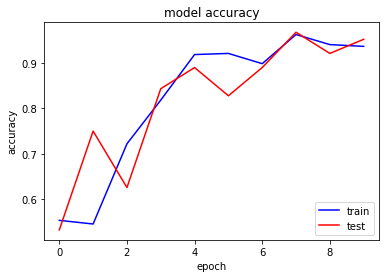

In [21]:
# Plot the accuracy curves for training and validation 
plt.plot(hist.history['accuracy'], color='b', label="Training accuracy")
plt.plot(hist.history['val_accuracy'], color='r', label="validation accuracy")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='lower right')

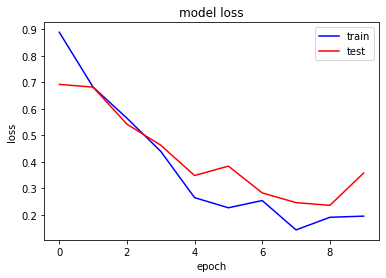

In [22]:
# Plot the loss curves for training and validation 
plt.plot(hist.history['loss'], color='b', label="Training loss")
plt.plot(hist.history['val_loss'], color='r', label="validation loss")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')

# **USING PRE-TRAINED MODEL VGG16 **

In [25]:
from keras.applications.vgg16 import VGG16
HEIGHT=224
WIDTH=224
CHANNEL=3

In [26]:
new_model=Sequential()

new_model.add(VGG16(weights="imagenet", include_top=False, input_shape=(HEIGHT, WIDTH, CHANNEL)))
new_model.add(Flatten())
new_model.add(Dense(128, activation="relu"))
new_model.add(Dense(64, activation="relu"))
new_model.add(Dense(64, activation="relu"))
new_model.add(Dense(1,activation='sigmoid'))
new_model.layers[-6].trainable = False

new_model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

58900480/58889256 [==============================] - 1s 0us/step


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [28]:
hist1=new_model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=10,
    validation_data=test_generator,
    validation_steps=2
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
8/8 [==============================] - 24s 2s/step - loss: 0.5079 - accuracy: 0.7578 - val_loss: 0.1771 - val_accuracy: 0.9531
Epoch 2/10
8/8 [==============================] - 19s 3s/step - loss: 0.0646 - accuracy: 0.9758 - val_loss: 0.0570 - val_accuracy: 0.9688
Epoch 3/10
8/8 [==============================] - 13s 2s/step - loss: 0.0745 - accuracy: 0.9798 - val_loss: 0.0282 - val_accuracy: 0.9844
Epoch 4/10
8/8 [==============================] - 13s 2s/step - loss: 0.0208 - accuracy: 0.9879 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 13s 2s/step - loss: 0.0222 - accuracy: 0.9879 - val_loss: 0.0234 - val_accuracy: 1.0000
Epoch 6/10
8/8 [==============================] - 13s 2s/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0338 - val_accuracy: 0.9844
Epoch 7/10
8/8 [==============================] - 13s 2s/step - loss: 0.0389 - accuracy: 0.9879 - val_loss: 0.0637 - val_accuracy: 0.9688
Epoch 8/10
8/8 [==================

In [29]:
### save the model
model.save('/content/drive/MyDrive/Dataset/vgg16_model1.h5')

In [31]:
from keras.models import load_model
new_model=load_model('/content/drive/MyDrive/Dataset/vgg16_model1.h5')

In [32]:
new_model.predict(img)

array([[0.7807994]], dtype=float32)

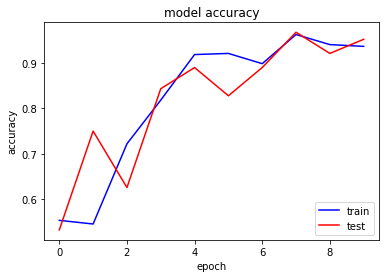

In [33]:
# Plot the accuracy curves for training and validation 
plt.plot(hist.history['accuracy'], color='b', label="Training accuracy")
plt.plot(hist.history['val_accuracy'], color='r', label="validation accuracy")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='lower right')

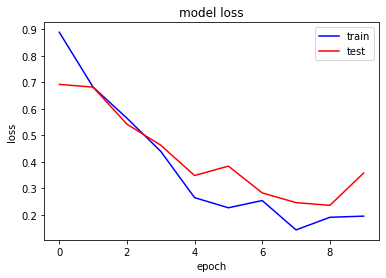

In [34]:
# Plot the loss curves for training and validation 
plt.plot(hist.history['loss'], color='b', label="Training loss")
plt.plot(hist.history['val_loss'], color='r', label="validation loss")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')